In [ ]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from datetime import datetime
#considerem a sigla "rd" como retorno diário

In [71]:
IBOV = wb.DataReader('^BVSP', data_source='yahoo', start='2009-1-1')#Cotação diária do Ibovesva desde 2009

In [93]:
import quandl 
"""Um site que organiza dados econômicos disponibiliza gratuitamente algumas bases de dados
Para baixar a biblioteca olhe na documentação https://docs.quandl.com/
O comando para baixar esses dados usando a biblioteca deles é quandl.get
"""
CDI_diario= quandl.get("BCB/12", authtoken="wHnVchHSPwZYMsXTPAUm",start_date="2009-1-1")# % diária
SELIC_diaria= quandl.get("BCB/11", authtoken="wHnVchHSPwZYMsXTPAUm",start_date="2009-1-1")# %diária
dolar_compra=quandl.get("BCB/10813", authtoken="wHnVchHSPwZYMsXTPAUm",start_date="2009-1-1")# Preço diário

In [94]:
IBOV.head()

,High,Low,Open,Close,Volume,Adj Close,rd_ibov
Date,,,,,,,
2009-01-02,40265.0,37550.0,37550.0,40244.0,1055200.0,40244.0,NaN
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0,0.031682
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0,0.019100
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0,-0.035262
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0,0.028687


In [95]:
CDI_diario.set_axis(['rd_CDI'],axis='columns',inplace=True)
CDI_diario.head()

,rd_CDI
Date,
2009-01-02,0.050683
2009-01-05,0.050578
2009-01-06,0.050613
2009-01-07,0.050648
2009-01-08,0.050613


In [96]:
SELIC_diaria.set_axis(['rd_SELIC'],axis='columns',inplace=True)
SELIC_diaria.head()

,rd_SELIC
Date,
2009-01-02,0.050858
2009-01-05,0.050823
2009-01-06,0.050823
2009-01-07,0.050823
2009-01-08,0.050823


In [97]:
dolar_compra.set_axis(['rd_dolar'],axis='columns',inplace=True)
dolar_compra.head()

,rd_dolar
Date,
2009-01-02,2.3290
2009-01-05,2.2772
2009-01-06,2.1881
2009-01-07,2.2166
2009-01-08,2.2675


Para o calculo do portfolio de maximo retorno e minimo risco, precisamos usar o retorno diário em %
devemos, transfomar o preço diário do dólar e preço ajustado do ibovespa,usando a seguinte equação:


# Retorno diário = ((preço atual)/(preço  do dia anterior))-1

# $$
Retorno diário = \frac{Preço atual}{Preço do dia anterior} - 1
$$

In [122]:
IBOVESPA=pd.DataFrame()

In [123]:
IBOVESPA['rd_ibov']=(IBOV['Adj Close']/IBOV['Adj Close'].shift(1))-1#inserindo uma coluna com o retorno diário
dolar_compra['rd_dolar']=(dolar_compra['rd_dolar']/dolar_compra['rd_dolar'].shift(1))-1 #


Por questões matemáticas utilizaremos o conceito de log retorno para os cálculos de correlação e covariância dos ativos.

In [ ]:
df.loc[:, ['A', 'B']] df.drop(['B', 'C'], axis=1)

In [109]:
ativos=pd.DataFrame()

In [131]:
ativos=dolar_compra.merge(IBOVESPA,on='Date').merge(SELIC_diaria,on='Date')
ativos.dropna(inplace=True)#comando para excluir onde tem-se elementos vazio, no nosso caso temos só as 2 primeiras linhas
ativos.head()

,rd_dolar,rd_ibov,rd_SELIC
Date,,,
2009-01-06,0.759204,0.019100,0.050823
2009-01-07,-1.332890,-0.035262,0.050823
2009-01-08,0.763002,0.028687,0.050823
2009-01-09,-0.646622,-0.009716,0.050823
2009-01-12,-0.450114,-0.052425,0.050823


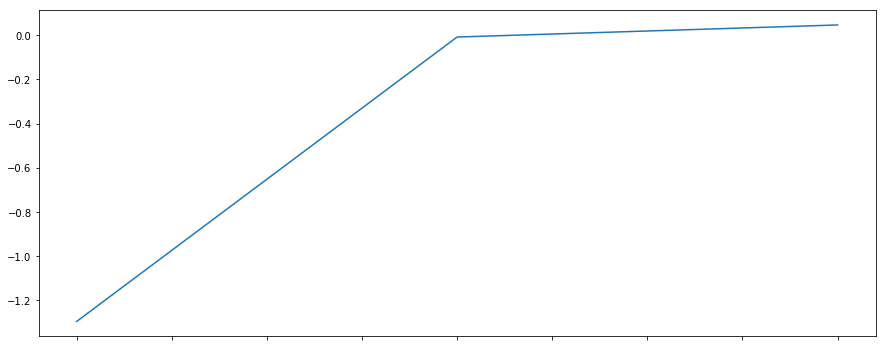

In [143]:
ativos.iloc[2019].plot(figsize=(15, 6))

In [144]:
ativos.corr()

,rd_dolar,rd_ibov,rd_SELIC
rd_dolar,1.000000,-0.021388,-0.011148
rd_ibov,-0.021388,1.000000,-0.002487
rd_SELIC,-0.011148,-0.002487,1.000000


In [138]:
ativos.mean()

rd_dolar         NaN
rd_ibov     0.000442
rd_SELIC    0.038245
dtype: float64

In [41]:
IBOV.head()

,High,Low,Open,Close,Volume,Adj Close,rd_IBOV
Date,,,,,,,
2009-01-05,41889.0,39526.0,40243.0,41519.0,1909200.0,41519.0,NaN
2009-01-06,42363.0,41520.0,41520.0,42312.0,1791000.0,42312.0,0.019100
2009-01-07,42308.0,40563.0,42308.0,40820.0,1383600.0,40820.0,-0.035262
2009-01-08,41991.0,40251.0,40819.0,41991.0,1556000.0,41991.0,0.028687
2009-01-09,42525.0,41181.0,41992.0,41583.0,1573400.0,41583.0,-0.009716


In [7]:
IBOV['data'] = pd.to_datetime(IBOV.data)
IBOV['data'] = IBOV['data'].dt.strftime('%d/%m/%Y')#fazendo as datas ficarem no formato certo pra juntar as 2 bases de dados


In [8]:
IBOV.head()

,High,Low,Open,Close,Volume,Adj Close,data
Date,,,,,,,
2000-01-03,17408.0,16719.0,17098.0,16930.0,0.0,16930.0,03/01/2000
2000-01-04,16908.0,15851.0,16908.0,15851.0,0.0,15851.0,04/01/2000
2000-01-05,16302.0,15350.0,15871.0,16245.0,0.0,16245.0,05/01/2000
2000-01-06,16499.0,15977.0,16237.0,16107.0,0.0,16107.0,06/01/2000
2000-01-07,16449.0,16125.0,16125.0,16309.0,0.0,16309.0,07/01/2000


In [9]:
IBOV.set_index(IBOV['data']).head()

,High,Low,Open,Close,Volume,Adj Close,data
data,,,,,,,
03/01/2000,17408.0,16719.0,17098.0,16930.0,0.0,16930.0,03/01/2000
04/01/2000,16908.0,15851.0,16908.0,15851.0,0.0,15851.0,04/01/2000
05/01/2000,16302.0,15350.0,15871.0,16245.0,0.0,16245.0,05/01/2000
06/01/2000,16499.0,15977.0,16237.0,16107.0,0.0,16107.0,06/01/2000
07/01/2000,16449.0,16125.0,16125.0,16309.0,0.0,16309.0,07/01/2000


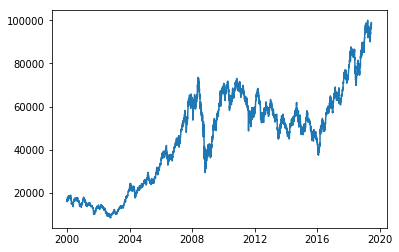

In [10]:
fig, ax = plt.subplots()
ax.plot(IBOV['Adj Close'])
plt.show()

In [11]:
origem='https://dadosabertos.bcb.gov.br/dataset/1178-taxa-de-juros---selic-anualizada-base-252#'#endereço do link
arquivo='juros_diarios_selic.csv'

In [12]:
df_selic = pd.read_csv('selic_bcb_api.csv', encoding = "utf-8", delimiter=';', index_col=0)

df_selic['valor'] = df_selic['valor'].str.replace(',', '.').astype(float)


In [13]:
data_inicial = '03/01/2000'

data_final = '01/08/2018'

df_selic = df_selic.loc[data_inicial:data_final]

In [14]:
df_selic.head()

,valor
data,
03/01/2000,19.04
04/01/2000,19.04
05/01/2000,19.05
06/01/2000,19.07
07/01/2000,19.07


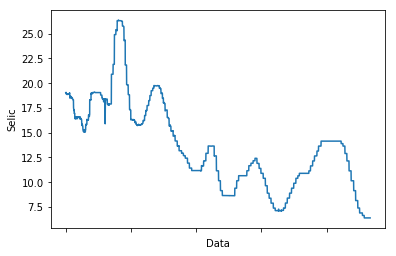

In [18]:
df_selic['valor'].plot()
plt.xlabel('Data')
plt.ylabel('Selic')
plt.show()

In [16]:
df_selic['data']=df_selic.index #mudar o nome da coluna

In [17]:
ibov_selic= pd.merge(df_selic,IBOV) # juntar as 2 bases

/home/raphael/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 'data' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1]:
ibov_selic.set_index(ibov_selic['data']).head()# usando a coluna data como index

NameError: name 'ibov_selic' is not defined

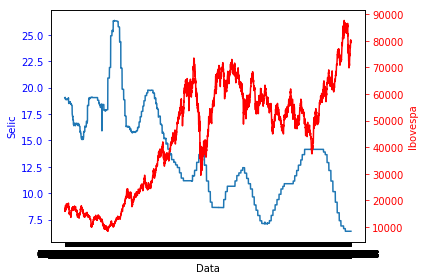

In [250]:
fig, ax1 = plt.subplots()
t =  np.arange(0.0, 2.0, 0.01)
x=ibov_selic['data']
s1 = np.exp(t)
ax1.plot(x,ibov_selic['valor'])
ax1.set_xlabel('Data')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Selic', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = ibov_selic['Adj Close']
ax2.plot(x,s2,color='r')
ax2.set_ylabel('Ibovespa', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [21]:
CDI_diario.head()

,Value
Date,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222


In [22]:
SELIC_diaria.head()

,Value
Date,
1986-06-04,0.065041
1986-06-05,0.067397
1986-06-06,0.066740
1986-06-09,0.068247
1986-06-10,0.067041


In [25]:
dolar_compra.tail()

,Value
Date,
2019-06-10,3.8784
2019-06-11,3.8658
2019-06-12,3.8431
2019-06-13,3.8423
2019-06-14,3.8807
